In [21]:
import pprint as pp

import numpy as np
import pandas as pd

from textcat.ml.tokenizer.adsorption_tokenizer import AdsorptionTokenizer
from textcat.utils import get_adsorption_string_from_df

## Load .lmdb dataset, and .pkl dict

In [22]:
SPLIT = "all" # choose between "all", "10k", and "100k" 
DFDIR_PATH = "../data/is2res_train_val_test_dfs"
DF_PATH = f"{DFDIR_PATH}/{SPLIT}/train/data.parquet"

In [23]:
df = pd.read_parquet(DF_PATH)

In [24]:
df['ads_symbols'].unique()

array(['*NH', '*COCHO', '*OH2', '*OCH2CH3', '*CH2', '*CCHOH', '*H',
       '*OCH3', '*OH', '*CCH3', '*C*C', '*NO', '*NO2', '*CHOHCH2',
       '*NONH', '*CCH2', '*CHCH2', '*C', '*ONN(CH3)2', '*CHCH2OH', '*CH4',
       '*OHCH3', '*O', '*CH*CH', '*N2', '*CHOH', '*COCH3', '*CCH',
       '*CHOHCH2OH', '*COHCHOH', '*CHCHOH', '*COHCH3', '*NHNH',
       '*CHOHCHOH', '*ONH', '*CHCHO', '*NH3', '*CHCO', '*CCO', '*CH3',
       '*COHCHO', 'CH2*CO', '*CN', '*OCH2CHOH', '*COHCH2OH', '*CHOHCH3',
       '*CH*COH', '*OHNNCH3', '*CCH2OH', '*OHNH2', '*COCH2O', '*CH2CH3',
       '*N', '*CHO*CHO', '*CCHO', '*CH2*O', '*NO3', '*CHOCHOH', '*N*NH',
       '*CH2OH', '*OHCH2CH3', '*OCHCH3', '*N*NO', '*CH2CH2OH', '*ONNH2',
       '*NO2NO2', '*CHOCH2OH', '*COHCOH'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460328 entries, 0 to 460327
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sid              460328 non-null  int64  
 1   anomaly          460328 non-null  int64  
 2   class            460328 non-null  int64  
 3   C                460328 non-null  int64  
 4   H                460328 non-null  int64  
 5   O                460328 non-null  int64  
 6   N                460328 non-null  int64  
 7   ads_size         460328 non-null  int64  
 8   ads_symbols      460328 non-null  object 
 9   ads_id           460328 non-null  int64  
 10  ads_smiles       460328 non-null  object 
 11  ads_inchi        460328 non-null  object 
 12  ads_inchikeys    460328 non-null  object 
 13  ads_ase_formula  460328 non-null  object 
 14  ads_energy_eV    460328 non-null  float64
 15  bulk_symbols     460328 non-null  object 
 16  bulk_mpid        460328 non-null  obje

In [26]:
len(df['ads_id'].unique())  # unique adsorbates

68

In [27]:
len(df['bulk_id'].unique())  # unique materials

9230

In [28]:
test_row = df.iloc[90]
test_dict = test_row.to_dict()

In [29]:
print(test_row)

sid                                                          1273041
anomaly                                                            0
class                                                              0
C                                                                  2
H                                                                  5
O                                                                  1
N                                                                  0
ads_size                                                           8
ads_symbols                                                 *CHOHCH3
ads_id                                                            54
ads_smiles                                  [H]OC([H])C([H])([H])[H]
ads_inchi                            InChI=1S/C2H5O/c1-2-3/h2-3H,1H3
ads_inchikeys                            GAWIXWVDTYZWAW-UHFFFAOYSA-N
ads_ase_formula                                                C2H5O
ads_energy_eV                     

## Adsorption tokenizer

### Configuration dictionary/toml file

In [31]:
config_dict = {"adsorbate": {"smiles": True, 
                        "formula": False,
                        "remove_asterisk": True,  # e.g., "C*" -> "C"
                        "pos": 0},
          "material": {"slices": True, 
                       "formula": False, 
                       "pos": 1}, 
          "surface": {"Miller": True, 
                      "termination": False, 
                      "pos": 2}, 
          "interaction":{},
          "general": {"distinguishCHNO": False} # Whether different token shoudl be used for C/H/N in adsorbate and bulk
          }

In [32]:
tokenizer = AdsorptionTokenizer(config_dict)  # or config_dict, accepts both

strings = [get_adsorption_string_from_df(row[1]) for row in df.iterrows()]

In [33]:
TEST_IDX = 5453

In [34]:
pp.pprint(strings[TEST_IDX])

('*CHCHO|K K Zn Zn P P 0 5 --o 0 5 o-o 0 5 ooo 0 2 --o 0 2 o-o 0 2 ooo 0 0 ++o '
 '0 0 o+o 0 0 +oo 0 3 -oo 0 3 --o 0 3 ooo 0 4 -oo 0 4 --o 0 4 ooo 1 2 --- 1 2 '
 'o-- 1 2 oo- 1 5 --o 1 5 o-o 1 5 ooo 1 1 ++o 1 1 o+o 1 1 +oo 1 4 -o- 1 4 --- '
 '1 4 oo- 1 3 -oo 1 3 --o 1 3 ooo 2 4 -oo 2 4 ooo 2 4 o+o 3 5 ooo 3 5 o-o 3 5 '
 '+oo |h2k1l2|P2K2Zn2|[H]CC([H])O')


In [35]:
pp.pprint(tokenizer.tokenize(strings[TEST_IDX]), compact=True)

['[H]', 'C', 'C', '(', '[H]', ')', 'O', '|', 'K', 'K', 'Zn', 'Zn', 'P', 'P',
 '0', '5', '--o', '0', '5', 'o-o', '0', '5', 'ooo', '0', '2', '--o', '0', '2',
 'o-o', '0', '2', 'ooo', '0', '0', '++o', '0', '0', 'o+o', '0', '0', '+oo', '0',
 '3', '-oo', '0', '3', '--o', '0', '3', 'ooo', '0', '4', '-oo', '0', '4', '--o',
 '0', '4', 'ooo', '1', '2', '---', '1', '2', 'o--', '1', '2', 'oo-', '1', '5',
 '--o', '1', '5', 'o-o', '1', '5', 'ooo', '1', '1', '++o', '1', '1', 'o+o', '1',
 '1', '+oo', '1', '4', '-o-', '1', '4', '---', '1', '4', 'oo-', '1', '3', '-oo',
 '1', '3', '--o', '1', '3', 'ooo', '2', '4', '-oo', '2', '4', 'ooo', '2', '4',
 'o+o', '3', '5', 'ooo', '3', '5', 'o-o', '3', '5', '+oo', '|', 'h2', 'k1',
 'l2']


In [16]:
for i, string in enumerate(strings):
    seq = tokenizer.tokenize(string)
    material0 = seq[seq.index("|")+1:]
    material = material0[:material0.index("|")]
    print(material, "    ", string.split("|")[3])

['Al', '20', 'Rh', '8']      Al20Rh8
['Zr', '2', 'Se', 'N', '2']      Zr2SeN2
['Ag', 'P', 'Pd', '5']      AgPPd5
['Sn', '8', 'Hf', '10']      Sn8Hf10
['Tc', '2', 'Os', '6']      Tc2Os6
['Ga', '9', 'Rb', '3']      Ga9Rb3
['V', '12', 'Ga', '14']      V12Ga14
['Sc', '3', 'Al']      Sc3Al
['Y', '2', 'Cd', '6']      Y2Cd6
['Zr', 'Ru']      ZrRu
['K', '8', 'Se', '20']      K8Se20
['Ag', 'Pd']      AgPd
['N', '2', 'Mn', '3']      N2Mn3
['S', '2', 'Ta']      S2Ta
['Y', '3', 'Ni', '9']      Y3Ni9
['Hf', '2', 'Ir', '2']      Hf2Ir2
['Mn', '16', 'Si', '28']      Mn16Si28
['Ca', '10', 'As', '6']      Ca10As6
['S', '6', 'Ga', '4']      S6Ga4
['S', '8', 'Tc', '4']      S8Tc4
['Si', '4', 'Os', '2']      Si4Os2
['N', '2', 'Ti', '4']      N2Ti4
['Te', '8', 'P', '8', 'Ir', '8']      Te8P8Ir8
['Ta', '4', 'Fe', '5', 'Te', '12']      Ta4Fe5Te12
['Rh', '8', 'Se', '12']      Rh8Se12
['Sc', '2', 'Au', '6']      Sc2Au6
['Sc', 'Pt', '3']      ScPt3
['Ca', 'Cd', 'Pd', '2']      CaCdPd2
['Ti', '3', 'Hg']      Ti3

## Generate vocabulary

In [36]:
vocabulary = tokenizer.generate_vocabulary(strings, "adssmiles_matslices")

In [37]:
from textcat.ml.tokenizer.bert_tokenizer import load_vocab

In [38]:
vocabulary = load_vocab("adssmiles_matslices")
pp.pprint(vocabulary)

OrderedDict([('(', 0),
             (')', 1),
             ('+++', 2),
             ('++-', 3),
             ('++o', 4),
             ('+-+', 5),
             ('+--', 6),
             ('+-o', 7),
             ('+o+', 8),
             ('+o-', 9),
             ('+oo', 10),
             ('-++', 11),
             ('-+-', 12),
             ('-+o', 13),
             ('--+', 14),
             ('---', 15),
             ('--o', 16),
             ('-o+', 17),
             ('-o-', 18),
             ('-oo', 19),
             ('0', 20),
             ('1', 21),
             ('10', 22),
             ('100', 23),
             ('101', 24),
             ('102', 25),
             ('103', 26),
             ('104', 27),
             ('105', 28),
             ('11', 29),
             ('12', 30),
             ('13', 31),
             ('14', 32),
             ('15', 33),
             ('16', 34),
             ('17', 35),
             ('18', 36),
             ('19', 37),
             ('2', 38),
             ('2

In [ ]:
pp.pprint(vocabulary)

## Wrap tokenizer to BERT tokenizer

In [14]:
from textcat.ml.tokenizer.bert_tokenizer import GeneralTokenizer

/u/smorandi/miniconda3/envs/textcat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
tokenizer = GeneralTokenizer("../data/vocabularies/vocabulary_formula.txt", AdsorptionTokenizer(config_dict))

In [16]:
tokenizer.vocab_size

122

In [17]:
tokenizer.vocab_list

['(',
 ')',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '32',
 '33',
 '34',
 '36',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '48',
 '5',
 '6',
 '68',
 '7',
 '8',
 '9',
 'Ag',
 'Al',
 'As',
 'Au',
 'B',
 'Bi',
 'C_BULK',
 'C_MOL',
 'Ca',
 'Cd',
 'Cl',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Fe',
 'Ga',
 'Ge',
 'H_BULK',
 'H_MOL',
 'Hf',
 'Hg',
 'In',
 'Ir',
 'K',
 'Mn',
 'Mo',
 'N_BULK',
 'N_MOL',
 'Na',
 'Nb',
 'Ni',
 'O_MOL',
 'Os',
 'P',
 'Pb',
 'Pd',
 'Pt',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sn',
 'Sr',
 'Ta',
 'Tc',
 'Te',
 'Ti',
 'Tl',
 'V',
 'W',
 'Y',
 'Zn',
 'Zr',
 '[CLS]',
 '[MASK]',
 '[PAD]',
 '[SEP]',
 '[UNK]',
 'h0',
 'h1',
 'h2',
 'k-1',
 'k-2',
 'k0',
 'k1',
 'k2',
 'l-1',
 'l-2',
 'l0',
 'l1',
 'l2',
 '|']

In [20]:
tokenizer.tokenize(strings[458])

['[H]',
 'C',
 'C',
 'O',
 '[H]',
 '|',
 'Tl',
 'Pd',
 '2',
 'Au',
 '|',
 'h2',
 'k1',
 'l1']

In [21]:
tokenizer.pad_token_id

105

## Test Torch Dataset

In [8]:
from textcat.ml.dataset.adsorption_text_dataset import AdsorptionTextDataset

In [9]:
dataset = AdsorptionTextDataset(df, tokenizer, 50)

In [ ]:
len(dataset)

In [ ]:
strings[192]

In [ ]:
dataset[9999]

## Exploratory analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

## Target distribution

Adsorption energy in eV

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df, x="eads_eV")

In [ ]:
df['eads_eV'].describe()

## String/Sequence length distribution

In [21]:
len_string, len_seq = [], []

for string in strings:
    len_string.append(len(string))
    seq = tokenizer.tokenize(string)
    len_seq.append(len(seq))

In [22]:
print(min(len_seq))
print(max(len_seq))
print(np.mean(len_seq))
print(np.std(len_seq))
print(min(len_string))
print(max(len_string))
print(np.mean(len_string))
print(np.std(len_string))

7
32
15.9751
4.7419489653516935
45
3427
466.0953
406.1761056708161


In [ ]:
fig, ax = plt.subplots(1, 2)

sns.kdeplot(x=len_string, ax=ax[0])
ax[0].set_xlabel("Length / -")
sns.kdeplot(x=len_seq, ax=ax[1])
ax[1].set_xlabel("Length / -")
max_y = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(0, max_y)
ax[1].set_ylim(0, max_y)
ax[1].set_title
plt.tight_layout()

## Frequence of individual tokens in all the training dataset

In [24]:
from collections import defaultdict

adsorbate_count = defaultdict(int)
material_count = defaultdict(int)
surface_count = defaultdict(int)

for string in strings:
    tokens = tokenizer.tokenize_adsorbate(string)
    for token in tokens:
        adsorbate_count[token] += 1
    tokens = tokenizer.tokenize_material(string)
    for token in tokens:
        material_count[token] += 1
    tokens = tokenizer.tokenize_surface(string)
    for token in tokens:
        surface_count[token] += 1


In [ ]:
surface_count

In [ ]:
adsorbate_count

In [31]:
# material_count

## SLICES sequence length

Check how SLICES length is distributed in the training data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df.tail()

sid  anomaly  class  C  H  O  N  ads_size ads_symbols  ads_id  \
460323   436036        1      2  0  3  0  1         4        *NH3      72   
460324   603385        0      1  0  1  1  2         4       *NONH      73   
460325  2090589        0      1  0  1  1  2         4       *NONH      73   
460326   526543        0      0  2  1  1  0         4       *CHCO      20   
460327  1397408        0      1  1  0  0  1         2         *CN      81   

       bulk_symbols   bulk_mpid  bulk_id  \
460323           PY      mp-994     2415   
460324       Si4Ru4      mp-189      826   
460325      SbTePd2  mp-1219442    11333   
460326         AlY3    mp-30338     2250   
460327      Si10Rh8   mp-568792      308   

                                                   slices  h  k  l   hkl  \
460323  Y P 0 1 --o 0 1 -o- 0 1 -oo 0 1 o-- 0 1 o-o 0 ...  1  1  0   110   
460324  Si Si Si Si Ru Ru Ru Ru 0 7 ooo 0 7 oo+ 0 2 -o...  2  2  1   221   
460325  Sb Te Pd Pd 0 3 -+o 0 3 ooo 0 3 o+o 0 2 -+o 0 ...  2 -1  2  2-12   
460326  Y Y Y Al 0 2 -oo 0 2 -+o 0 2 ooo 0 2 o+o 0 1 -...  1  1  0   110   
460327  Si Si Si Si Si Si Si Si Si Si Rh Rh Rh Rh Rh R...  0  0  1   001   

         eads_eV  
460323 -0.614203  
460324  2.610350  
460325  3.096430  
460326 -2.886467  
460327 -1.805861

In [76]:
slices_lengths = []
natoms_bulk = []
nelems_diff_bulk = []

for data in df.iterrows():
    slices = data[1]['slices'].split(" ")
    counter = 0
    elems = set()
    for i in slices:
        if i.isnumeric():
            break
        counter += 1
        elems.add(i)
    nelems_diff_bulk.append(len(elems))
    natoms_bulk.append(counter)
    slices_lengths.append(len(slices))

df['slices_len'] = slices_lengths
df['natoms_bulk'] = natoms_bulk
df['nelems_bulk'] = nelems_diff_bulk

In [77]:
df['nelems_bulk'].unique()

array([2, 3, 1])

In [92]:
df[df['nelems_bulk'] == 1]['bulk_symbols']

39        Hg2
58        Te3
65         Na
84         Ta
124       Ru2
         ... 
460262    Rh4
460289    Au2
460290    Sc2
460293    In2
460303    B12
Name: bulk_symbols, Length: 21888, dtype: object

In [41]:
df['natoms_bulk'].describe()

count    460328.000000
mean         28.871657
std          23.978404
min           2.000000
25%          12.000000
50%          22.000000
75%          36.000000
max         212.000000
Name: natoms_bulk, dtype: float64

In [34]:
df['slices_len'].describe()

count    460328.000000
mean        152.554509
std         131.007824
min           6.000000
25%          75.000000
50%         103.000000
75%         201.000000
max        1055.000000
Name: slices_len, dtype: float64

In [88]:
idxmin = df['natoms_bulk'].idxmin()
idxmax = df['natoms_bulk'].idxmax()

In [90]:
df.iloc[idxmax]

sid                                                        603624
anomaly                                                         0
class                                                           2
C                                                               2
H                                                               1
O                                                               1
N                                                               0
ads_size                                                        4
ads_symbols                                                 *CCHO
ads_id                                                         21
bulk_symbols                                               H68C38
bulk_mpid                                               mp-866659
bulk_id                                                      1741
slices          H H H H H H H H H H H H H H H H H H H H H H H ...
h                                                               0
k         

In [65]:
from random import randint

idx = randint(0, len(df)-1)

In [66]:
print(df.iloc[idx]['slices'])

print(df.iloc[idx]['natoms_bulk'])

Ga Ga Ga Ga Ga Ga Ga Ga Ga Ga Ga Ga Ru Ru Ru Ru 0 4 ooo 0 13 ooo 0 15 o+o 0 10 o+o 0 5 oo+ 0 12 +oo 0 7 ooo 0 11 ooo 0 3 ++o 1 14 oo- 1 11 -o- 1 7 -oo 1 6 oo- 1 12 ooo 1 8 ooo 1 5 ooo 1 13 oo- 1 10 o+o 2 4 --o 2 11 -o- 2 15 -oo 2 7 -oo 2 5 o-o 2 10 ooo 2 3 ooo 2 12 o-o 2 14 oo- 3 15 -oo 3 7 -oo 3 11 -oo 3 10 ooo 3 12 o-o 3 5 o-+ 3 14 ooo 4 13 oo- 4 5 ooo 4 15 o+o 4 10 o+o 4 11 oo- 4 12 +oo 4 7 ooo 5 6 oo- 5 14 o+- 5 13 oo- 5 9 o+- 5 8 o+o 6 7 -oo 6 14 ooo 6 11 -oo 6 12 ooo 6 9 ooo 6 10 o+o 6 13 ooo 7 15 ooo 7 8 ooo 7 9 ooo 7 12 +oo 8 14 oo- 8 10 ooo 8 15 ooo 8 13 oo- 8 11 oo- 8 9 oo- 9 10 ooo 9 14 ooo 9 15 ooo 9 13 ooo 9 11 ooo 10 12 o-o 10 15 ooo 11 13 ooo 11 14 +oo 12 15 -+o 13 14 ooo 
48


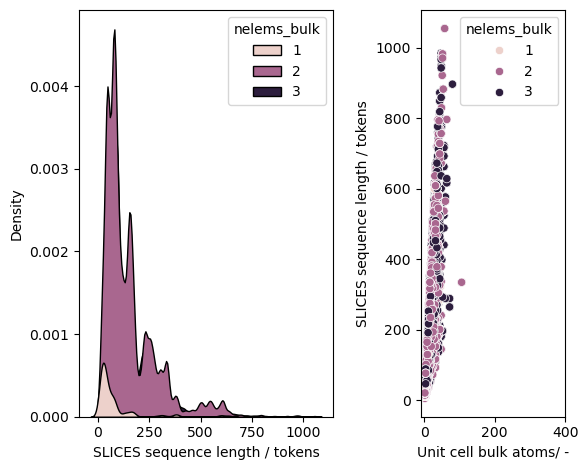

In [87]:
fig, ax = plt.subplots(1, 2)

sns.kdeplot(df, x='slices_len', ax=ax[0], hue='nelems_bulk', fill=True, alpha=1, ec='black')

ax[0].set_xlabel("SLICES sequence length / tokens")

sns.scatterplot(df, x='natoms_bulk', y='slices_len', hue='nelems_bulk', ax=ax[1])

ax[1].set_ylabel("SLICES sequence length / tokens")
ax[1].set_xlabel("Unit cell bulk atoms/ -")
ax[1].set_aspect("equal")
ax[1].set_xlim([-10, 400])
plt.tight_layout()

### Eads vs. Adsorbate size

<Axes: xlabel='ads_size', ylabel='eads_eV'>

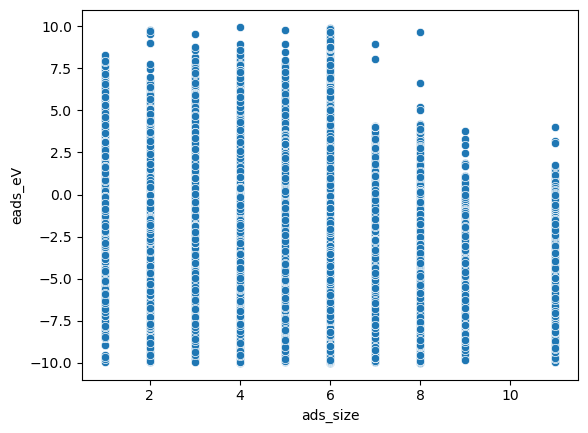

In [7]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='ads_size', y='eads_eV')

<Axes: xlabel='eads_eV', ylabel='Density'>

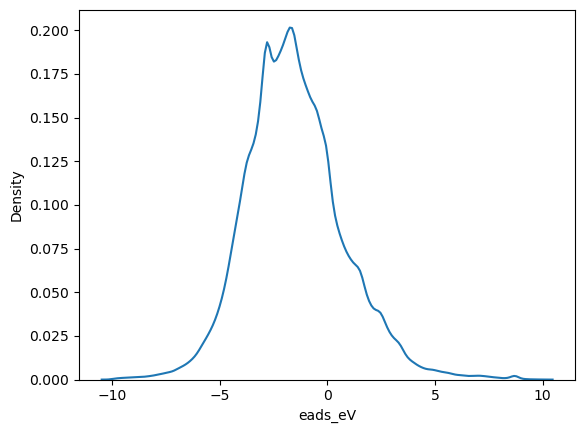

In [5]:
import seaborn as sns
sns.kdeplot(df, x='eads_eV')

In [1]:
fig, ax = plt.subplots()

sns.kdeplot(df, x='eads_eV', hue='ads_size', palette='viridis')

NameError: name 'plt' is not defined

In [95]:
df[df['ads_size'] == 11]['eads_eV'].describe()

count    5506.000000
mean       -3.147222
std         2.101176
min        -9.969943
25%        -4.467933
50%        -2.384106
75%        -1.547321
max         3.997205
Name: eads_eV, dtype: float64